Источник: https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python

In [6]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

# Exploratory data analysis (EDA)

!pandas profiler

Основная цель EDA найти инсайты в данных, которые можно будет использовать в процессе построения модели.

<img src="http://sharpsightlabs.com/wp-content/uploads/2016/05/1_data-analysis-for-ML_how-we-use-dataAnalysis_2016-05-16.png" />

В работе используются данные из соревнования следующего [соревнования](https://www.kaggle.com/c/house-prices-advanced-regression-techniques), где требовалось предсказать цену жилья по его входным параметрам.

## Preparations

А также загрузим таблицу с данными и посмотрим, что в ней

In [7]:
## Link to the data https://www.kaggle.com/c/house-prices-advanced-regression-techniques/download/train.csv
df = pd.read_csv('./data/WS1_data.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Видно, что в таблице уже есть идентификатор (столбец `Id`), поэтому используем его как индекс в таблице

In [8]:
df.set_index('Id').head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<font color=#cc0000> Note: </font> большиснтво операций в `pandas` по дефолту происходят с аргументом `inplace=False`. Это означает, что производимые над объектами операции не изменяют их, а лишь производят изменения над копией объекта и выводят результат

Выведем еще раз нашу таблицу и удостоверимся, что она не изменилась.

In [9]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Для того, чтобы изменения подействовали, передадим аргумент `inplace=True` 

In [10]:
df.set_index('Id', inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Присваивание `index`-а можно также сделать по-другому, сделать это при считывании файла, следующей командой:

`df = pd.read_csv('./train.csv', index_col=0)`

Вернемся к исследованию. Выведем базовую информацию о таблице

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

На выходе получаем кол-во строк в таблице, информацию об индексах, информацию о стобцах и сколько памяти это все занимает. Уже из этой информации мы можем сделать вывод, что некоторые столбцы не релеванты, т.к. имеют очень много `None`-ов (например `Alley` или `PoolQC`). Помимо этого видно, что численных и `Object` столбцов почти поровну.

Посмотрим % пропущенных значений в таблице для каждого столбца

In [12]:
df.count() / df.shape[0]

MSSubClass       1.000000
MSZoning         1.000000
LotFrontage      0.822603
LotArea          1.000000
Street           1.000000
Alley            0.062329
LotShape         1.000000
LandContour      1.000000
Utilities        1.000000
LotConfig        1.000000
LandSlope        1.000000
Neighborhood     1.000000
Condition1       1.000000
Condition2       1.000000
BldgType         1.000000
HouseStyle       1.000000
OverallQual      1.000000
OverallCond      1.000000
YearBuilt        1.000000
YearRemodAdd     1.000000
RoofStyle        1.000000
RoofMatl         1.000000
Exterior1st      1.000000
Exterior2nd      1.000000
MasVnrType       0.994521
MasVnrArea       0.994521
ExterQual        1.000000
ExterCond        1.000000
Foundation       1.000000
BsmtQual         0.974658
                   ...   
BedroomAbvGr     1.000000
KitchenAbvGr     1.000000
KitchenQual      1.000000
TotRmsAbvGrd     1.000000
Functional       1.000000
Fireplaces       1.000000
FireplaceQu      0.527397
GarageType  

Удалим из таблицы столбцы с 30% или больше `None` значений

In [13]:
df.columns[df.count() / df.shape[0] <= 0.3]

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [14]:
df.drop(df.columns[df.count() / df.shape[0] <= 0.3], axis=1, inplace=True)

Теперь исследуем как распределена величина, которую нам потребуется предсказать

In [15]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

E:\Python\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


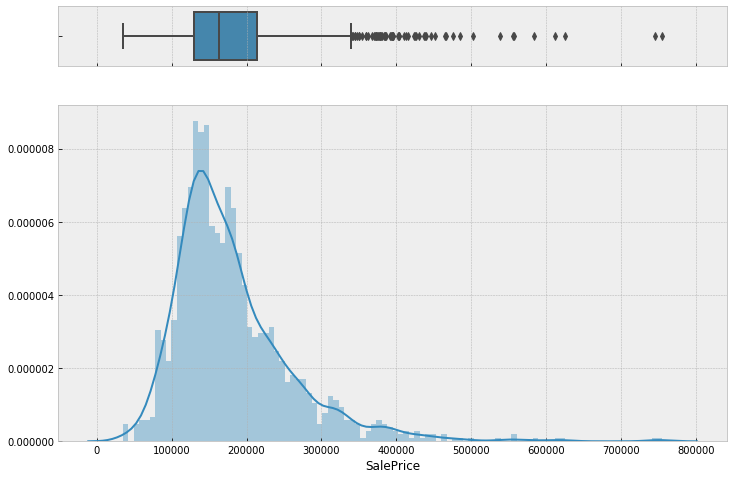

In [16]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(12, 8))
 
# Add a graph in each part
sns.boxplot(df['SalePrice'], ax=ax_box)
sns.distplot(df['SalePrice'], ax=ax_hist, bins=100, hist_kws={'alpha': 0.4})

# Remove x axis name for the boxplot
ax_box.set(xlabel='');

<font color='chocolate'> Из графика видно, что распределение цены квартиры смещенно вправо и что присутствует множество выбросов. Также можно заметить, что изабясь от выбросов, распределение цен будет похоже на нормальное.</font>

## Numerical data

Выделим все численные столбцы и посмотрим на их распределение

In [17]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [18]:
df_num = df.select_dtypes(include=['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


### Distribution

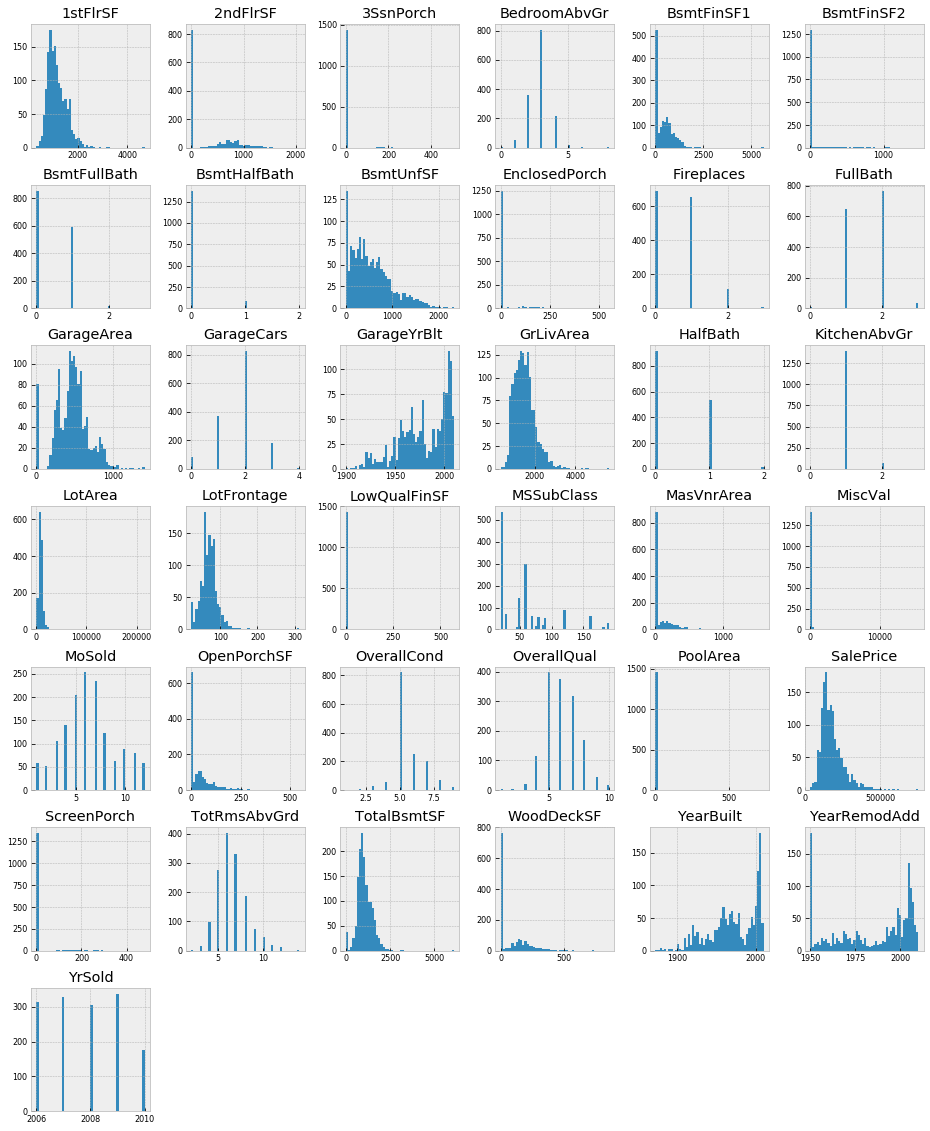

In [19]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

<font color='chocolate'>
    Видно, что признаки `1stFlrSF`, `TotalBsmtSF`, `LotFrontage`, `GrLiveArea` ... распределены почти также как и наша целевая переменная `SalePrice`. Это может намекать на их взаимосвязь. Исследуем этот вопрос дальше.
</font>

### Correlation

Посмотрим на корреляции признаков с целевой переменной `SalePrice`. Сохраним те, которые хорошо скоррелированы в отдельный массив

In [20]:
df_num_corr = df_num.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 10 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


<font color=#cc0000> Note: </font> на значение корреляции сильно влияют выбросы, поэтому перед подсчетом лучше их удалить.

Но стоит помнить, что корреляция не всегда объясняет зависимость между данными и дополнительно можно построить `pairplor`. Используя такой график также можно заметить некоторые закономерности.

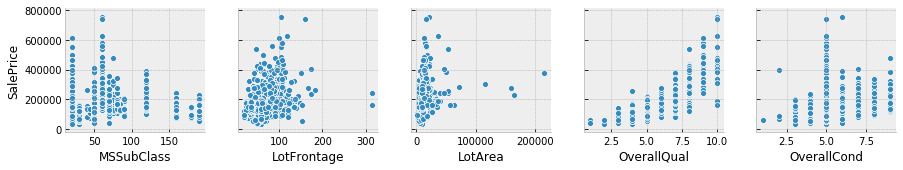

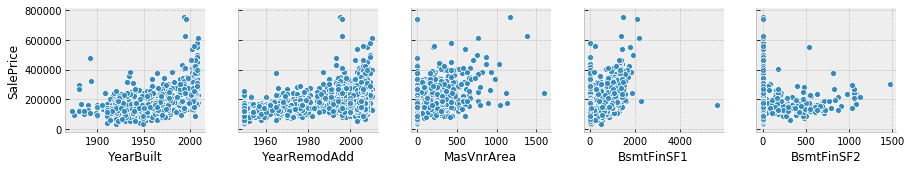

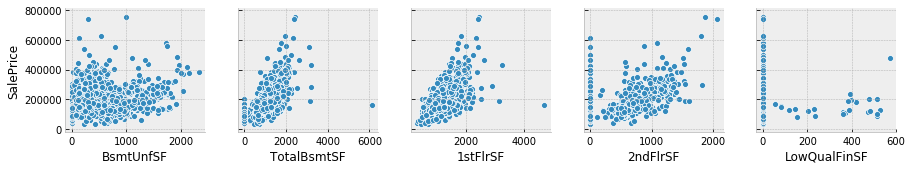

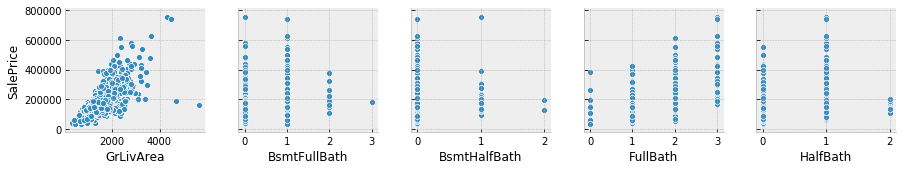

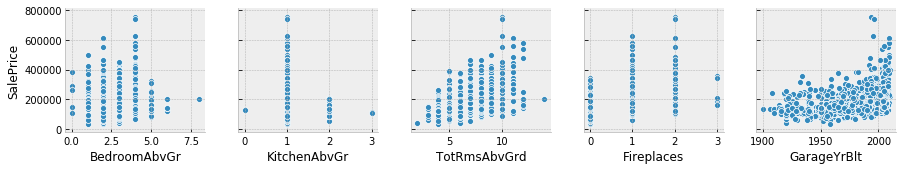

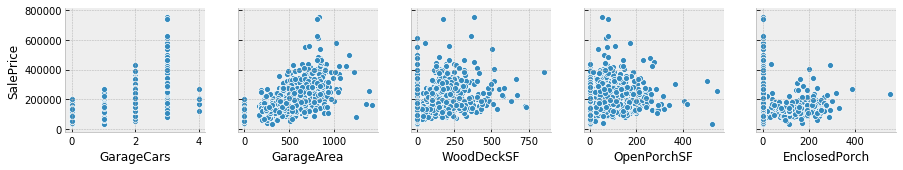

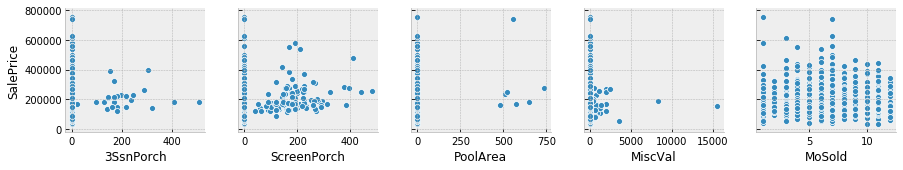

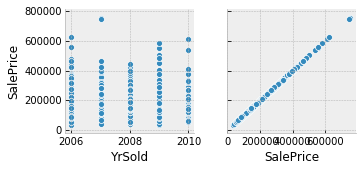

In [21]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                 x_vars=df_num.columns[i:i+5],
                 y_vars=['SalePrice'])

<font color='chocolate'>
    Из рисунков можно определить некоторые взаимосвязи. Для части признаков, таких как `OverallQual` эта связь линейна. Помимо этого видно, что для некоторых признаков, множество точек расположены на прямой `x = 0`, что говорит об отсутвие этого признака у дома. Например, рассмотрим `PoolArea` и увидим, что лишь у десятка домов из представленных есть бассейн.
</font>

Удалим эти `0` и повторим поиск наиболее коррелирующих признаков

In [22]:
import operator

correlations = []
for col in df_num.columns[:-1]: # -1 because the last column is SalePrice
    tmpDf = df_num.loc[df_num[col] != 0, [col, 'SalePrice']]
    correlations.append(tmpDf.corr()['SalePrice'][0])

correlations = pd.Series(correlations, index=df_num.columns[:-1])
golden_features_list = correlations[abs(correlations) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 11 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
2ndFlrSF        0.673305
GarageCars      0.637095
TotalBsmtSF     0.609681
GarageArea      0.608405
1stFlrSF        0.605852
FullBath        0.574563
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
dtype: float64


<font color='chocolate'>
    Заметим, что после удаления выбросов, добавился еще один хорошо коррелирующий признак. А именно `2ndFlrSF`.
</font>

**Вывод:**
<font color='chocolate'>
    Беглый анализ распределений и корреляций помог выделить 11 признаков с сильной зависимостью относительно цены дома `SalePrice`
</font>

### Feature to feature relationship

Исследуем взаимоотношения между признаками. Для этого мы можем также рассмотреть `pairplot` для кажой пары признаков, но такой подход врядли можно назвать эффективным из-за того, что потребуется просмотреть очень много графиков, которые сложно быстро проинтерпретировать. Поэтому построим корреляционную матрицу.

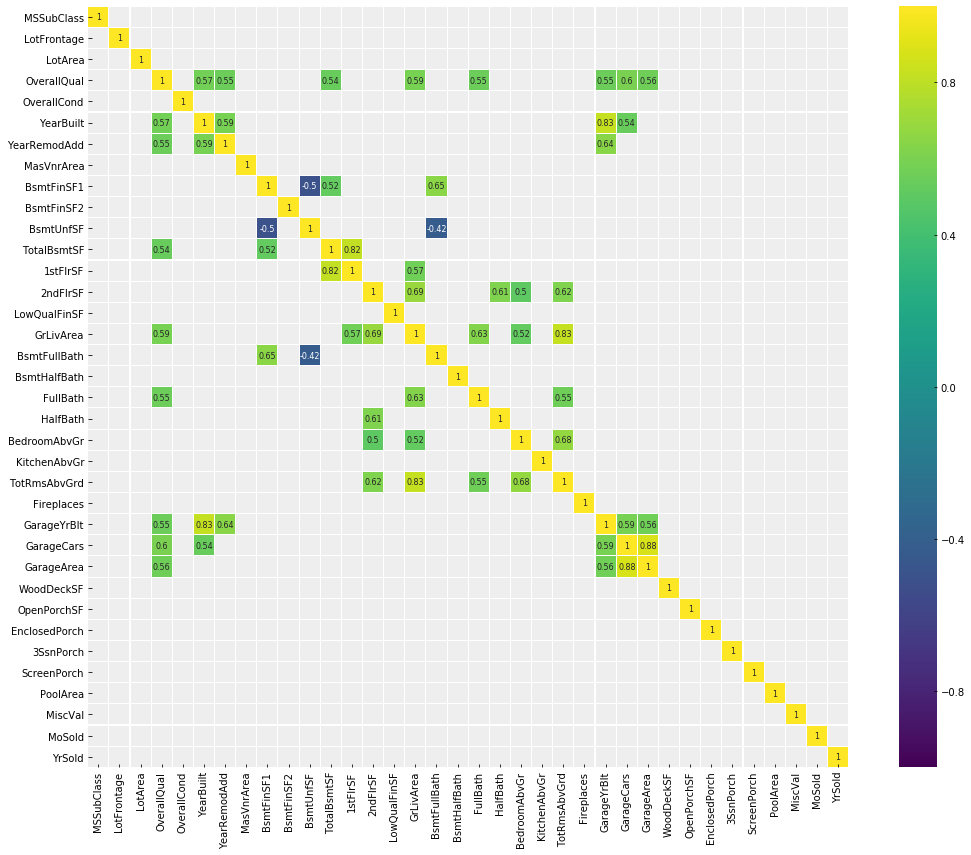

In [23]:
corr = df_num.drop('SalePrice', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(18, 14))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

**Вывод:**
<font color='chocolate'>
    Из графика можно сделать вывод, что часть признаков сильно взаимосвязаны друг с другом. Это можно использовать для того, чтобы сократить количество признаков (например, оставить только 1 признак из `GarageCars` или `GarageArea`) или чтобы скомбинировать признаки в новые (например, мы можем заметить, что год постройки дома не всегда равен году постройки гаража. Соответсвенно мы можем создать признак "достраивался ли дом")
</font>

## Categorical features

Помимо численных признаков в нашем датасете также присутствуют и категориальные, часть из которых мы уже успели немного исследовать.

In [24]:
categorical_columns = list(set(df.columns) - set(df._get_numeric_data().columns))

columns_n_unique = df_num.nunique()
categorical_columns = categorical_columns + columns_n_unique[columns_n_unique <= 5].index.tolist()

In [25]:
df_cat = df[['SalePrice']].copy()
for column in categorical_columns:
    df_cat[column] = df[column].astype('category')

df_cat.head()

,SalePrice,LotConfig,HeatingQC,RoofMatl,BldgType,HouseStyle,FireplaceQu,ExterQual,CentralAir,GarageType,...,SaleCondition,Foundation,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,Fireplaces,GarageCars,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,208500,Inside,Ex,CompShg,1Fam,2Story,NaN,Gd,Y,Attchd,...,Normal,PConc,1,0,2,1,1,0,2,2008
2,181500,FR2,Ex,CompShg,1Fam,1Story,TA,TA,Y,Attchd,...,Normal,CBlock,0,1,2,0,1,1,2,2007
3,223500,Inside,Ex,CompShg,1Fam,2Story,TA,Gd,Y,Attchd,...,Normal,PConc,1,0,2,1,1,1,2,2008
4,140000,Corner,Gd,CompShg,1Fam,2Story,Gd,TA,Y,Detchd,...,Abnorml,BrkTil,1,0,1,0,1,1,3,2006
5,250000,FR2,Ex,CompShg,1Fam,2Story,TA,Gd,Y,Attchd,...,Normal,PConc,1,0,2,1,1,1,3,2008


Посмотрим на распределения цены в зависимости от значений категориального признака. Заодно построим распределение значений категориального признанка

Для начала, возьмем столбец `RoofMatl`, характеризующий материал крыши дома.

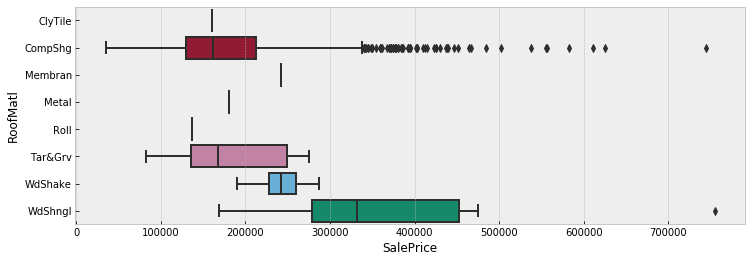

In [26]:
fig = plt.figure(figsize=(12, 4))
sns.boxplot(y='RoofMatl', x='SalePrice', data=df_cat);

<font color='chocolate'>
    Из графика можно сделать вывод, что материал `WdShngl` в среднем используется для более дорогих домов, чем материалы `Tar&Grv` и `WdShake`. Ряд материалов видимо использовались по одному разу (`ClyTile`, `Membran`, `Metal`, `Roll`). А материал `CompShg` используется для люых домов.
</font>



<font color=#cc0000>
    НО!<br>
    Note:
</font> Не стоит смотреть на распределение цены в зависимости от значений категории без учета распределения этих самых категорий. При этом желательно также помнить про распределение цены. Без всего этого можно сделать ложные выводы.

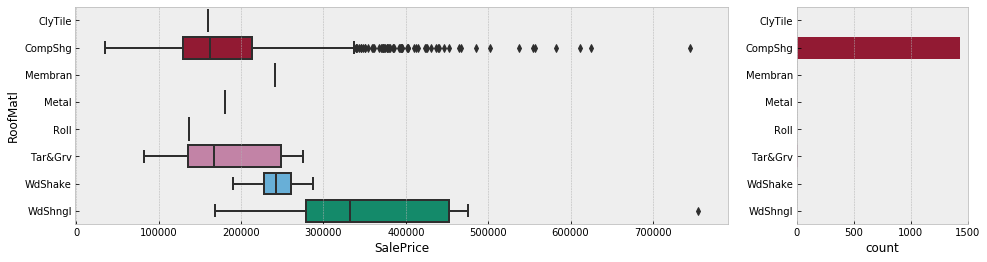

In [27]:
fig = plt.figure(figsize=(16, 4))
grid = plt.GridSpec(1, 4, wspace=0.4, hspace=0.1)
box_ax = fig.add_subplot(grid[0, :3])
cnt_ax = fig.add_subplot(grid[0, -1])

sns.boxplot(y='RoofMatl', x='SalePrice', data=df_cat, ax=box_ax)
sns.countplot(y='RoofMatl', data=df_cat, ax=cnt_ax)
cnt_ax.set_ylabel('');

<font color='chocolate'>
    Получаем, что выводы из предыдущего графика врядли можно считать значимыми из-за того, что у нас почти нет достаточного кол-ва примеров для каждого из классов.
<br>
    Из текущего графика видно, что у нас есть явно доминирующее значение признака, что делает признак достаточно не эффективным для предсказания цены.
</font>

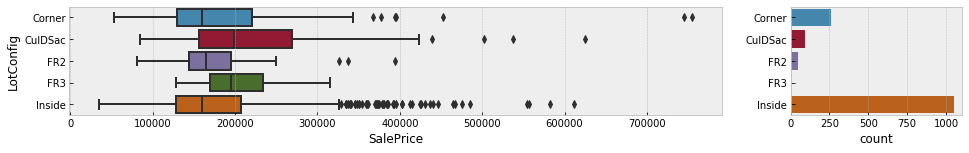

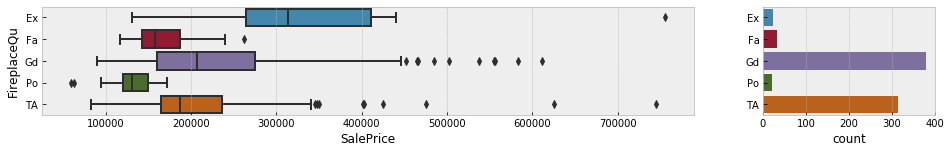

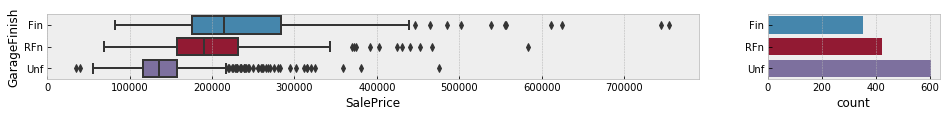

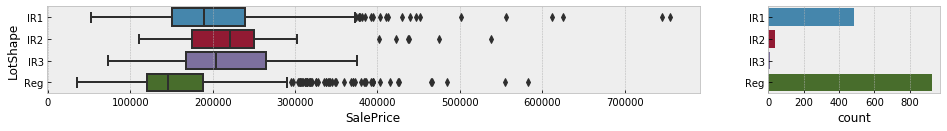

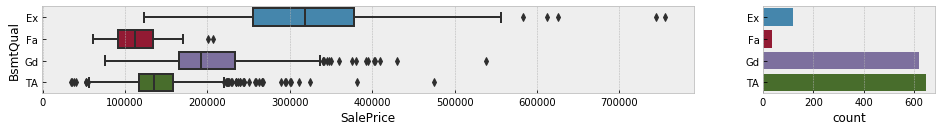

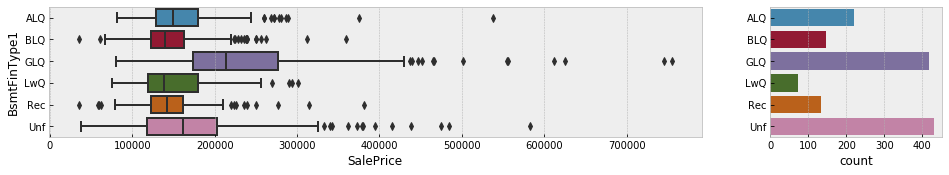

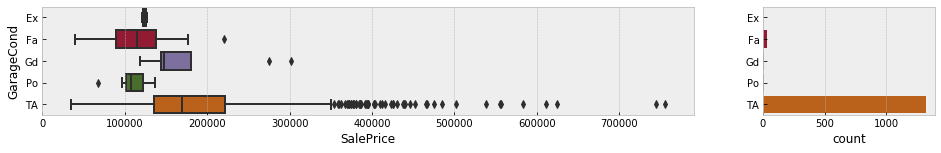

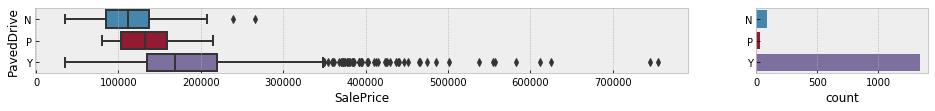

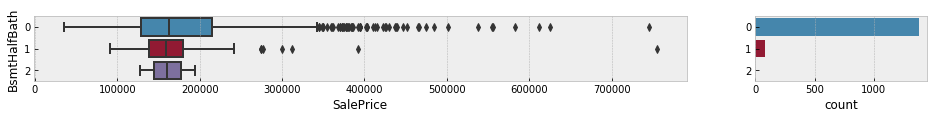

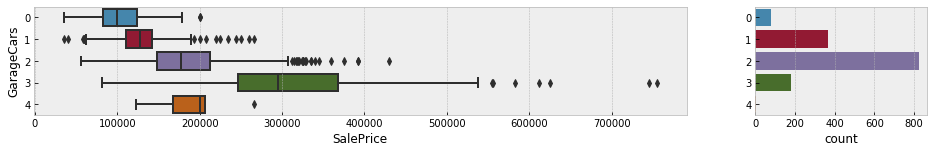

In [28]:
columns_n_unique = df_cat.nunique()
for column in categorical_columns[::5]:
    
    n_unique = columns_n_unique[column]
    
    fig = plt.figure(figsize=(16, n_unique * 0.4))
    grid = plt.GridSpec(1, 4, wspace=0.4, hspace=0.1)
    box_ax = fig.add_subplot(grid[0, :3])
    cnt_ax = fig.add_subplot(grid[0, -1])
    
    sns.boxplot(y=column, x='SalePrice', data=df_cat, ax=box_ax)
    sns.countplot(y=column, data=df_cat, ax=cnt_ax)
    cnt_ax.set_ylabel('')

<font color='chocolate'>
    Видно, что для некоторых категориальных признаков существуют доминирующие значения. Так, например, для покрытия крыши (`RoofMatl`) в основном используют `CompShg`.
    <br>
    Помимо этого можно заметить, что кол-во машин в гараже сильно влияет на финальную цену дома (что было уже обнаружено при анализе корреляций). Или, что для признака класс жилищной зоны (`MSZoning`) значение `RL` соответствует в большинстве случаев более дорогому жилью, нежели класс `RM`.
</font>

**Вывод:**
<font color='chocolate'>
    Подобный анализ помог выявить часть признаков, которые почти никак не влияют на целевую переменную, исследовать какие значения категориальных признаков почти не представлены в датасете (что в дальнейшем может быть использовано для фильтрации), а также увидеть возможные взаимосвязи цены дома с некоторыми значениями категориальных признаков
</font>

## Usefool tool (forbidden to use in HW)

In [29]:
!pip install pandas-profiling

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [30]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

E:\Python\anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "E:\Python\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "E:\Python\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "E:\Python\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "E:\Python\anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "E:\Python\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "E:\Python\anaconda3\lib\site-packages\torn

Number of variables,77
Number of observations,1460
Total Missing (%),1.4%
Total size in memory,878.4 KiB
Average record size in memory,616.1 B
Numeric,38
Categorical,39
Boolean,0
Date,0
Text (Unique),0
Rejected,0


# Statistics

## Hypothesis testing

Рассмотрим как можно проверять статистические гипотезы в python

Проверим следующую гипотезу

$H_0:$ Цена распределена нормально

In [31]:
st.normaltest(df_num.SalePrice)

NormaltestResult(statistic=610.8359109472653, pvalue=2.283848353787728e-133)

<font color='chocolate'>
    Так как $\text{p-value} < 0.05$, то при уровне значимости $\alpha = 0.05$ мы отвергаем гипотезу.
</font>

### Задание

Выяснить какие из численных признаков распределены нормально воспользовавшись другим статистическим тестом

In [27]:
normality_test_pvalues = dict()
for column in df_num.columns:
    normality_test_pvalues[column] = st.shapiro(df_num.loc[~pd.isnull(df_num[column]), column])[1]
    if normality_test_pvalues[column] > 0.05:
        print('Column "{:13s}"", p-value {:6f}'.format(column, normality_test_pvalues[column]))

<font color='chocolate'>
    Нет нормально распределенных признаков
</font>

### Задание

Для выборок, где `MSZoning` = `RL` и где `MSZoning` = `RM`, проверить можно ли считать, что цены из одного распределения

In [28]:
rl_prices = df[df['MSZoning'] == 'RL'].SalePrice
rm_prices = df[df['MSZoning'] == 'RM'].SalePrice

st.mannwhitneyu(rl_prices, rm_prices)

MannwhitneyuResult(statistic=47783.0, pvalue=5.0233520439864057e-48)

<font color='chocolate'>
    Гипотезу о том, что цены из одного распределения отвергаем
</font>

## Correlation

### Задание

Помимо линейного коэффициента корреляции, проверить корреляцию Спирмана и Кендала. Проверить как отличаются топ-10 самых коррелируемых с ценой признаков для всех трех величин.

In [29]:
top_tens = pd.DataFrame()
for correlation_function in [st.pearsonr, st.spearmanr, st.kendalltau]:
    correlations = pd.Series(
        [correlation_function(df_num[column], df_num['SalePrice'])[0] for column in df_num.columns],
        index=df_num.columns
    ).sort_values(ascending=False)
    top_tens[correlation_function.__name__] = correlations.index[1:11]
top_tens

,pearsonr,spearmanr,kendalltau
0,OverallQual,OverallQual,OverallQual
1,GrLivArea,GrLivArea,GarageCars
2,GarageCars,GarageCars,GrLivArea
3,GarageArea,YearBuilt,FullBath
4,TotalBsmtSF,GarageArea,GarageArea
5,1stFlrSF,FullBath,YearBuilt
6,FullBath,TotalBsmtSF,TotalBsmtSF
7,TotRmsAbvGrd,1stFlrSF,YearRemodAdd
8,YearBuilt,YearRemodAdd,Fireplaces
9,YearRemodAdd,TotRmsAbvGrd,1stFlrSF


<font color='chocolate'>
    Списки топ-10 самых коррелированных признаков почти не отличаются. В основном, меняется только порядок признаков.
</font>

## Confidence interval

### Задание

Ваш друг собирается сменить жилье в Бостоне и он в курсе того, что у вас есть доступ к базе данных. Его очень интересует новостройки (`YearBuilt` $\geq 2000$ года постройки), так как его старенький дом ему уже поднадоел. И, к сожалению, он разбирается в статистике. Поэтому он попросил вас сообщить следующие вещи:
* соответствующий интерквантильному расстоянию ценовой диапозон для новостроек, чтобы прикинуть сколько он потратит
* 68% доверительный интервал для средней цены квартир с такими же параметрами, как его, чтобы понять, сколько примерно он сможет заработать на продаже своей квартиры (1 гаражное место `GarageCars`, 5-7 комнат `TotRmsAbvGrd`, не новостройка)

In [30]:
novostroyka_indices = df.YearBuilt >= 2000
one_car_garage_indices = df.GarageCars == 1
medium_n_rooms_indices = (df.TotRmsAbvGrd >= 5) & (df.TotRmsAbvGrd <= 7)

In [31]:
df[novostroyka_indices].SalePrice.quantile(0.25), df[novostroyka_indices].SalePrice.quantile(0.75)

(184587.5, 276375.0)

In [32]:
mean = df[~novostroyka_indices & one_car_garage_indices & medium_n_rooms_indices].SalePrice.mean()
std = df[~novostroyka_indices & one_car_garage_indices & medium_n_rooms_indices].SalePrice.std()
n = (~novostroyka_indices & one_car_garage_indices & medium_n_rooms_indices).sum()

(mean - std / np.sqrt(n), mean + std / np.sqrt(n))

(126738.72585567838, 129738.953325209)

<font color='chocolate'>
    Интерквантильный диапозон - (184587, 276375)<br>
    68% доверительный интервал для средней цены - (126738, 129738)
</font>

### Задание

Теоретические детали задачи можно смотреть [здесь (Лекция 11-12)](ftp://ftp.vt.tpu.ru/study/Katsman/public/Statistica/Lectures/New/) или [здесь](https://www2.isye.gatech.edu/~yxie77/isye2028/lecture12.pdf)

Чтобы представлять распределение цены построим простейшую линейную модель, которая на вход принимает признак `OverallQual`. Для этого, введем обозначения:
* $\mathbf{x} - $ вектор признаков (в данном случае хранит, значение `OverallQual`)
* $\mathbf{y} - $ целевой вектор со значениями цены

$$
\begin{eqnarray}
    & \mathbf{y} = \mathbf{x} a + b + \varepsilon \qquad \varepsilon^2 = (\mathbf{y} - \mathbf{x} a - b)^T (\mathbf{y} - \mathbf{x} a - b) \rightarrow \min \\
    & \Downarrow \\
    & \begin{cases}
        \frac{\partial \varepsilon}{\partial a} = 0 \\
        \frac{\partial \varepsilon}{\partial b} = 0 
    \end{cases} \\
    & \Downarrow \\
    & \begin{cases}
        \mathbf{x}^T(\mathbf{y} - \mathbf{x} a - b) = 0 \\
        \mathbb{1}^T(\mathbf{y} - \mathbf{x} a - b) = 0 
    \end{cases} \\
    & \Downarrow (2) \\
    & \bar{\mathbf{y}} - \bar{\mathbf{x}} a - b = 0 \\
    & \Downarrow \\
    & \mathbf{x}^T(\mathbf{y} - \mathbf{x} a - \bar{\mathbf{y}} - \bar{\mathbf{x}} a) = 0 \\
    & \Downarrow \\
    & \hat{a} = \frac{\mathbf{x}^T (\mathbf{y} - \bar{\mathbf{y}})}{\mathbf{x}^T (\mathbf{x} - \bar{\mathbf{x}})} = \frac{\mathbf{x}^T (\mathbf{y} - \bar{\mathbf{y}}) - \bar{\mathbf{x}} \cdot \overbrace{\mathbb{1}(\mathbf{y} - \bar{\mathbf{y}})}^{=0}}{\mathbf{x}^T (\mathbf{x} - \bar{\mathbf{x}}) - \bar{\mathbf{x}} \cdot \underbrace{\mathbb{1}(\mathbf{x} - \bar{\mathbf{x}})}_{=0}} = \frac{(\mathbf{x} - \bar{\mathbf{x}})^T (\mathbf{y} - \bar{\mathbf{y}})}{(\mathbf{x} - \bar{\mathbf{x}})^T (\mathbf{x} - \bar{\mathbf{x}})} = \frac{S_{\mathbf{x}\mathbf{y}}}{S_{\mathbf{x}\mathbf{x}}}\\
    & \hat{b} = \bar{\mathbf{y}} - \hat{a} \bar{\mathbf{x}}
\end{eqnarray}
$$

Так как $x, y$ случайные величины, то и $\bar{x}, \bar{y}$ - случайные величины, а следовательно и $\hat{a}, \hat{b}$ тоже. Более того, справедливо следующее:
$$
    \hat{a} \sim N\left( a, S_a\right) \qquad S_a = \frac{\sigma^2}{S_{\mathbf{x}\mathbf{x}}} \\
    \hat{b} \sim N\left( b, S_b\right) \qquad S_b = \sigma^2 \cdot \left(\frac{1}{n} + \frac{\bar{\mathbf{x}}}{S_{\mathbf{x}\mathbf{x}}} \right) \\
$$
где $\sigma^2 - $ дисперсия ошибки $\varepsilon$. Но в процессе ее значение заменяется несмещенной оценкой
$$\sigma^2 \approx S = \frac{1}{n-2} \sum (y_i - \hat{a} x_i - \hat{b})^2$$

Получается, что мы можем построить доверительные интервалы для $a$ и $b$. Для этого рассмотрим следующие статистики, которые имеют распределение Стьюдента с числом степеней свободы равным $n - 2$:
$$
t_a = \frac{a - \hat{a}}{\sqrt{S_a}} \quad t_b = \frac{b - \hat{b}}{\sqrt{S_b}}
$$

Постройте 95% доверительные интервалы для коэффициентов $a$ и $b$

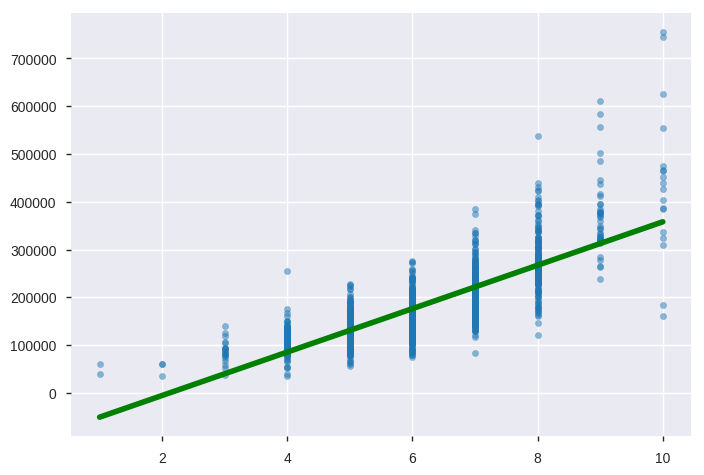

In [33]:
x, y = df.OverallQual.values, df.SalePrice.values

S_xx = (x - x.mean()).dot(x - x.mean())
S_xy = (x - x.mean()).dot(y - y.mean())

a_ols = S_xy / S_xx
b_ols = y.mean() - a_ols * x.mean()

y_hat = x * a_ols + b_ols

x_plot = np.linspace(x.min(), x.max())
y_plot = x_plot * a_ols + b_ols
plt.scatter(x, y, s=20, alpha=0.5)
plt.plot(x_plot, y_plot, 'g', linewidth=4)

In [34]:
S = np.square(y - a_ols * x - b_ols).sum() / (y.shape[0] - 1)
S_a = S / S_xx
S_b = S * (1 / x.shape[0] + x.mean() / S_xx)

t_quantiles = st.t(df.shape[0] - 2).ppf([0.025, 0.975])
interval_a = t_quantiles * np.sqrt(S_a) + a_ols
interval_b = t_quantiles * np.sqrt(S_b) + b_ols

In [35]:
display(interval_a, interval_b)

array([43630.91248524, 47240.69270096])

array([-101314.48752692,  -91097.6715026 ])

<font color='chocolate'>
    95% доверительный интервал для $a$ - (43630, 47240)<br>
    95% доверительный интервал для $b$ - (-101314,  -91097)
</font>

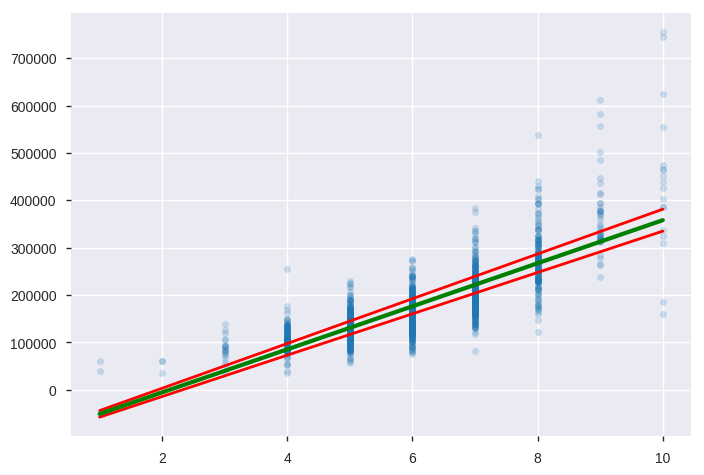

In [36]:
edges = np.array(
    [x_plot * interval_a[i] + interval_b[j] for i, j in [[0, 0], [0, 1], [1, 0], [1, 1]]]
)
plt.scatter(x, y, s=20, alpha=0.2)
plt.plot(x_plot, edges.min(axis=0), 'r', linewidth=2)
plt.plot(x_plot, edges.max(axis=0), 'r', linewidth=2)
plt.plot(x_plot, y_plot, 'g', linewidth=3)

Но больший интерес представляет распределение $\tilde{y}$ - СВ характеризующая $\hat{y}$ при фиксированном $x = x_0$. При этом следующая статистика тоже распределена согласно распредеению Стьюдента с $n-2$ степенями свободы:
$$
\begin{eqnarray}
    & \displaystyle{t_{\displaystyle\tilde{y}}} = \displaystyle\frac{\tilde{y} - \hat{y}}{\displaystyle\sqrt{S_{\mathbf{y}|\mathbf{x}} \cdot \left( \displaystyle\frac{1}{n} + \frac{(x_0 - \bar{\mathbf{x}})^2}{\displaystyle\sum(x_0 - x_i)^2} \right)}} \\
    & S_{\mathbf{y}|\mathbf{x}} = \frac{\displaystyle\sum (y_i - \hat{y}_i)^2}{n-2}
\end{eqnarray}
$$
Изобразите 95% интервал на графике.

In [37]:
S_yx_conditional = np.square(y - y_hat).sum() / (n - 2)
weight_S = 1 / n + np.square(x_plot - x.mean()) / \
           np.square(np.repeat(x_plot.reshape((-1, 1)), x.shape[0], axis=1) - x).sum(axis=1)

lower_bound_interval = t_quantiles[0] * np.sqrt(S_yx_conditional * weight_S) + y_plot
upper_bound_interval = t_quantiles[1] * np.sqrt(S_yx_conditional * weight_S) + y_plot

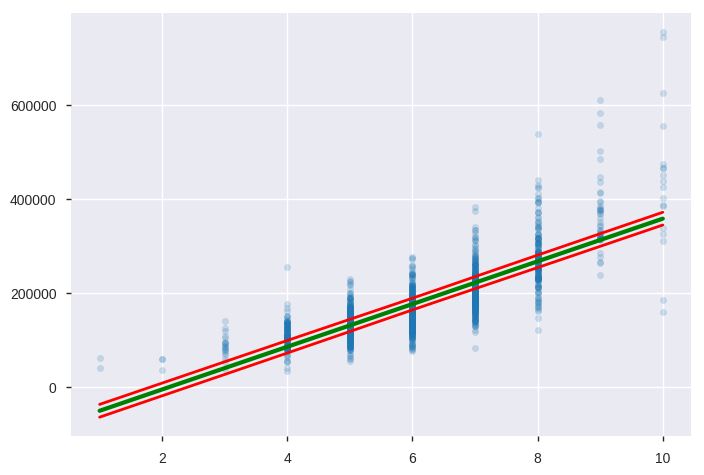

In [38]:
plt.scatter(x, y, s=20, alpha=0.2)
plt.plot(x_plot, lower_bound_interval, 'r', linewidth=2)
plt.plot(x_plot, upper_bound_interval, 'r', linewidth=2)
plt.plot(x_plot, y_plot, 'g', linewidth=3)

<font color='chocolate'>
    Требуемый график изображен выше
</font>

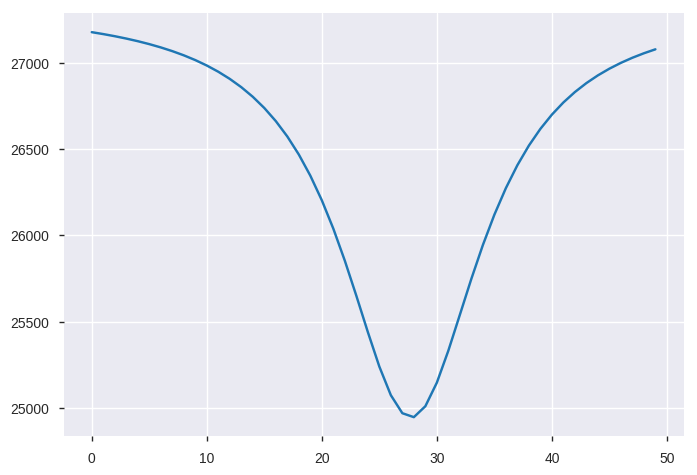

In [39]:
plt.plot(upper_bound_interval -lower_bound_interval)